# EDA Guided Project
# Exploring a dataset and analyzing


In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
#expand the no of columns tha are show

pd.set_option('display.max_columns', 200)


# 1. Data Understanding



about rollercoasters

In [2]:
df = pd.read_csv('coaster_db.csv')

In [3]:
df.shape

(1087, 56)

In [16]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [17]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [23]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Data Preparation

In [ ]:
Drop cols and rows that we dont want to use


In [24]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [26]:
# subset this dataset
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [34]:
df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status',# 'Opening date',
     #  'Type', 
    'Manufacturer',
    #z   'Height restriction', 'Model', 'Height',
    #   'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 
    # 'Opened',
    #'Replaced by', 'Website',
      # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [32]:
# Example of another way to drop columns
#or USE DROP COMMAND TO SUBSET A DATASET


#axis = 1 will drop a column and not a row
#df.drop(['Opening date'], axis = 1)

In [42]:
df.dtypes

#now, we clean the datatypes


df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])


df['year_introduced'] = pd.to_numeric(df['year_introduced'])


df.dtypes


coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [43]:
#Rename the columns

df.rename function will accept a dictionary ie curly brackets

In [47]:
df = df.rename(columns = {'coaster_name': 'Coaster_Name',
                     'year_introduced': 'Year_Introduced',
                     'opening_date_clean': 'Opening_Date_Clean',
                     'height_ft':'Height_ft',
                     'Inversions_clean': 'Inversions',
                     'Gforce_clean':'Gforce'})


df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [49]:
# Identify missing values or null values



df.isna()

#tells us f there is a null value in ever single row

df.isna().sum()
#tells us for each column

Coaster_Name            0
Location                0
Status                213
Manufacturer           59
Year_Introduced         0
latitude              275
longitude             275
Type_Main               0
Opening_Date_Clean    250
speed_mph             150
Height_ft             916
Inversions              0
Gforce                725
dtype: int64

In [53]:
#df.loc[df.duplicated()]

#Gives us the 2nd and subsequent duplicated rows, ignores the first row

#can run duplicated on a subset
df.loc[df.duplicated(subset = ['Coaster_Name'])]




,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [54]:
#checking an example duplicate
df.query('Coaster_Name =="Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [55]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date_Clean', 'speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [66]:
df = df.loc[~df.duplicated(subset = ['Coaster_Name', 'Location', 'Opening_Date_Clean'])].reset_index(drop = True).copy()

df.shape

(990, 13)

In [86]:
df.loc[(df['speed_mph']>50) & (df['speed_mph']<60)]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,speed_mph,Height_ft,Inversions,Gforce
20,The Wild One (roller coaster),Six Flags America,NaN,Dinn Corporation,1917,38.9092,-76.7725,Wood,NaT,53.0,NaN,0,NaN
29,Giant Dipper,Santa Cruz Beach Boardwalk,Operating,Arthur Looff,1924,36.9647,-122.0153,Wood,1924-05-17,55.0,NaN,0,NaN
30,Pippin (roller coaster),Kennywood,Operating,NaN,1924,40.3889,-79.8650,Wood,1968-01-01,55.0,NaN,0,NaN
56,Big Dipper (Luna Park Sydney),Other,NaN,NaN,1935,NaN,NaN,Wood,NaT,58.0,NaN,0,NaN
60,Cyclone (Lakeside Amusement Park),Lakeside Amusement Park,Operating,NaN,1940,39.7808,-105.0540,Wood,1940-05-17,55.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,The Ride to Happiness,Plopsaland De Panne,Operating,Mack Rides,2021,51.0810,2.5989,Steel,2021-07-01,55.9,NaN,6,NaN
980,Defiance (roller coaster),Glenwood Caverns Adventure Park,Under construction,Gerstlauer,2022,NaN,NaN,Steel,2022-01-01,56.0,NaN,2,NaN
983,Fønix (roller coaster),Fårup Sommerland,Under construction,Vekoma,2022,NaN,NaN,Steel,NaT,59.0,NaN,3,4.1
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN


# 3. Feature Understanding

In [ ]:
Univariate Analysis

Feature Distributions - Histogram ,KDE, Boxplot

In [68]:
df['Year_Introduced'].value_counts()


#counts the number of unuqye values ie that occur only once

#meaning is that in 1999, 46 new roller coasters were introduced and in 2000, 45 new were



1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

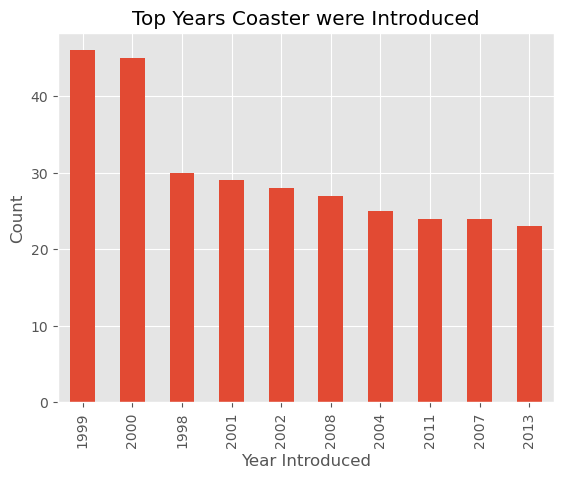

In [80]:
ax = df['Year_Introduced'].value_counts().head(10)\
.plot(kind='bar', title = 'Top Years Coaster were Introduced')
 #barh = horizotal

#Firsst 10 most common years for roller coasters to be introduced

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')


Text(0.5, 0, 'Speed(mph)')

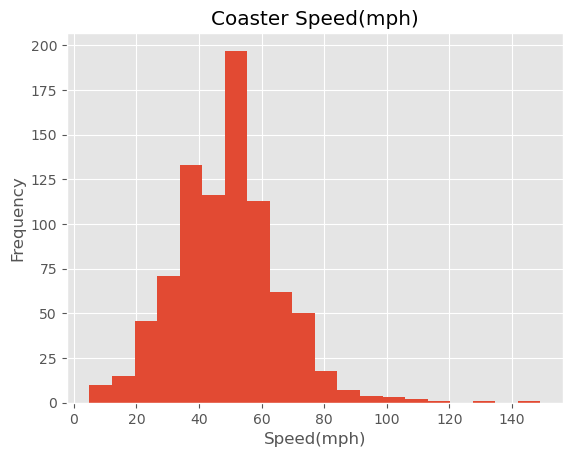

In [90]:
ax = df['speed_mph'].plot(kind = 'hist', bins = 20, title ='Coaster Speed(mph)')

ax.set_xlabel('Speed(mph)')

Text(0.5, 0, 'Speed(mph)')

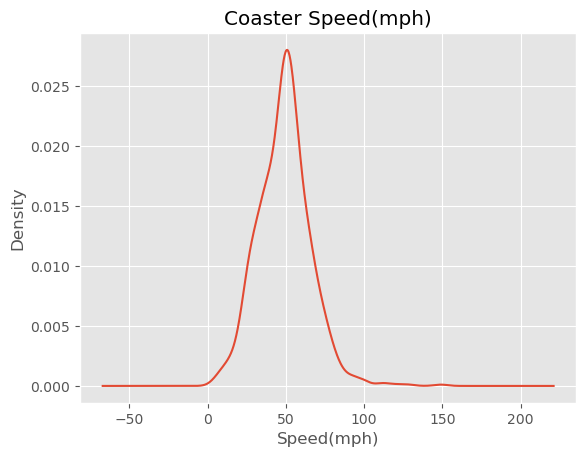

In [88]:
ax = df['speed_mph'].plot(kind = 'kde', title ='Coaster Speed(mph)')

ax.set_xlabel('Speed(mph)')

# Feature Relationships

In [92]:
# Scatterplot, heatmap correlation, pairplot, groupby comparisons
Compare 2 features side by side by making a scatterplot

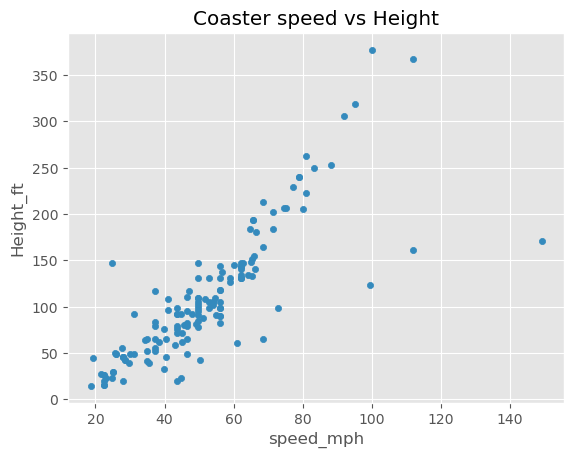

In [100]:
df.plot(kind = 'scatter', x = 'speed_mph', 
        y = 'Height_ft',
       title = 'Coaster speed vs Height')


# <AxesSubplot:title={'center':'Coaster speed vs Height'}, xlabel='speed_mph', ylabel='Height_ft'>
#In order to not see the above line, we shpw the axes oject using plt,show
plt.show()

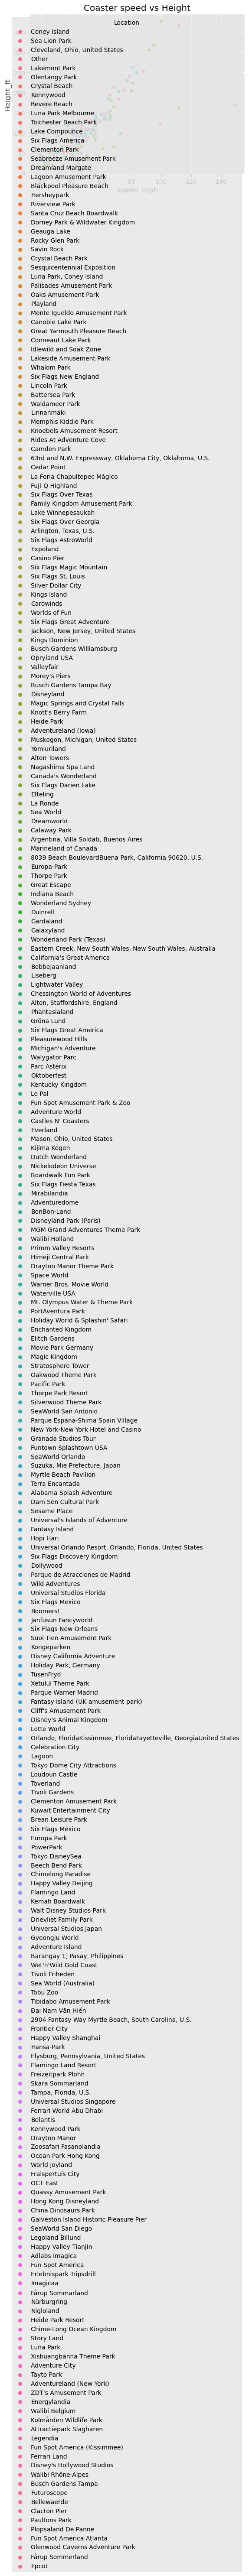

In [116]:
ax = sns.scatterplot(x = 'speed_mph', y ='Height_ft',data = df, hue = 'Location')

ax.set_title('Coaster speed vs Height')

plt.show()

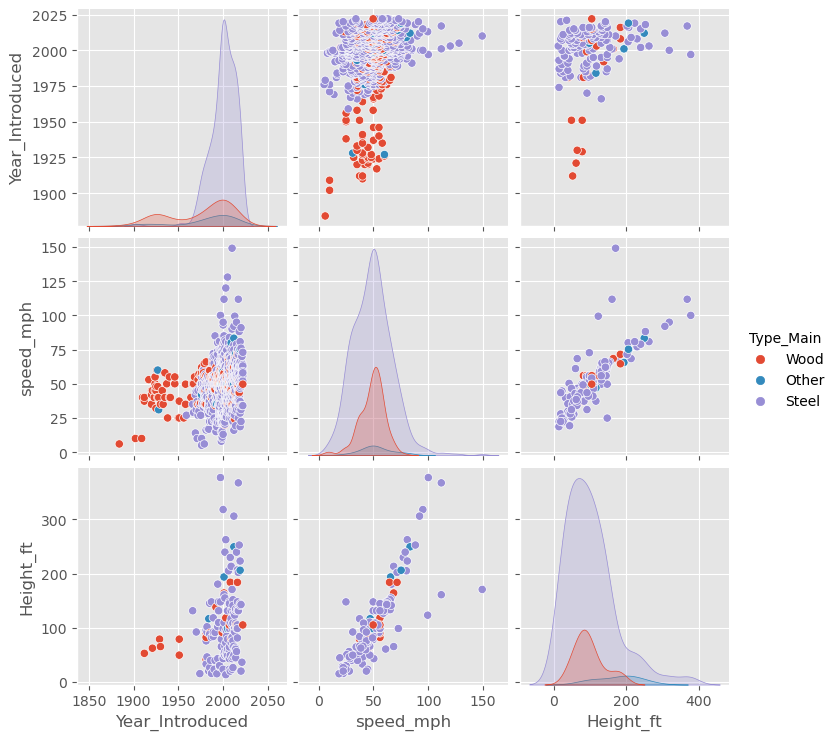

In [107]:
#more than 2 featires to be compared

#bydefault, kind = scatter
sns.pairplot(data = df, vars = ['Year_Introduced', 'speed_mph', 'Height_ft'], hue = 'Type_Main')
#relnship between pairs of features using scatter plot
plt.show()

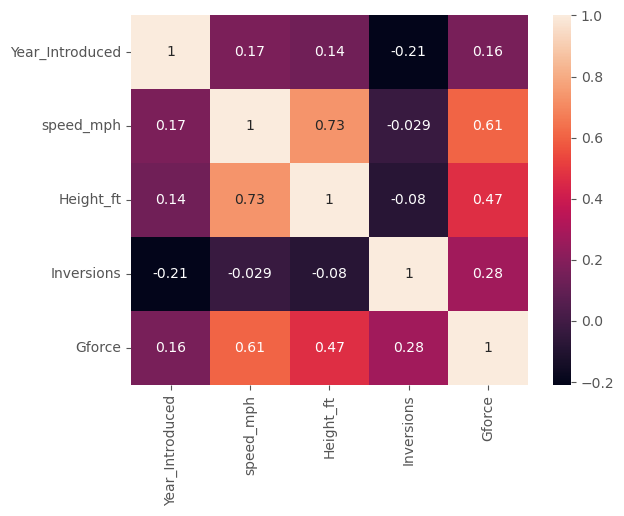

In [113]:
cormat = df[['Year_Introduced', 'speed_mph', 'Height_ft', 'Inversions', 'Gforce']].dropna().corr()


sns.heatmap(data = cormat, annot = True)

plt.show()

# Asking a question to be answered about our dataset

In [118]:
#WHat are the locations having the fastest rollercoasters(has to be a minimum of 10 roller coasters)?

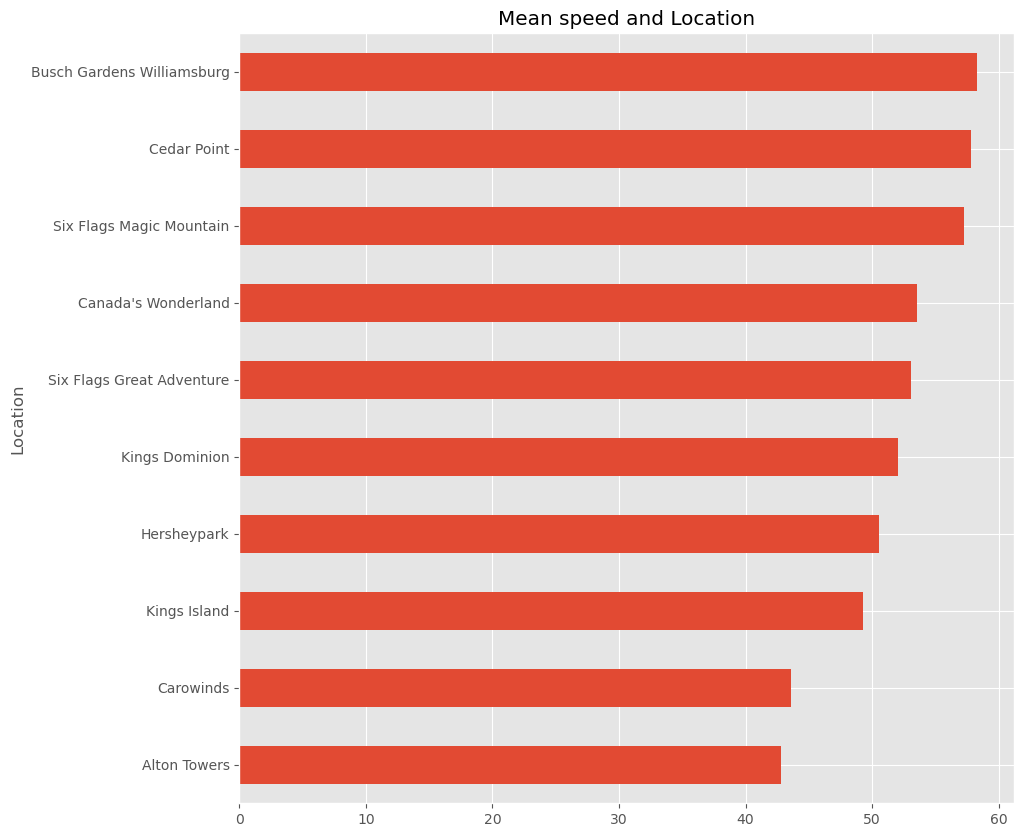

In [135]:
df.query('Location != "Other" ') \
.groupby('Location')['speed_mph'] \
.agg(['mean','count']).query('count >= 10')\
.sort_values('mean')['mean']\
.plot(kind = 'barh', figsize = (10,10), title = 'Mean speed and Location' )


plt.show()

In [142]:
df.loc[df['Location']=='Alton Towers']['speed_mph'].mean()

42.791666666666664